# PARTE 1 - REGRESSÃO LINEAR SIMPLES

Carregue o conjunto de dados de gorjetas. Faça o que se pede:
1. Utilizando a biblioteca scikit-learn, treine um modelo de regressão linear que receba como entrada o valor total da conta (total_bill) e faça a predição do valor da gorjeta (tip).
2. Mostre na tela o valor da função custo (erro médio quadrático / MSE) para o modelo treinado
3. Mostre na tela os valores dos pesos (parâmetros).
4. Para um valor de entrada de 30, qual a predição do modelo?
5. Crie uma visualização que mostra no mesmo plot o scatterplot entre a entrada e a saída e a linha de regressão aprendida pelo modelo. E.g.:

In [407]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [408]:
df = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv')
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


### Questão 1
Utilizando a biblioteca scikit-learn, treine um modelo de regressão linear que receba como entrada o valor total da conta (total_bill) e faça a predição do valor da gorjeta (tip).

In [409]:
x = df[['total_bill']]
y = df['tip']

In [410]:
x.shape

(244, 1)

In [411]:
y.shape

(244,)

In [412]:
# criando e treinando o modelo
model = LinearRegression()
model.fit(x, y)

LinearRegression()

In [413]:
# Construindo a predição do modelo
y_pred_model = model.predict(x)
print(y_pred_model[:20])

[2.70463616 2.00622312 3.12683472 3.40725019 3.5028225  3.57633966
 1.84133463 3.74332864 2.49983836 2.47253198 1.99887141 4.6234341
 2.53974767 2.85587147 2.47778321 3.1866987  2.00517288 2.631119
 2.70253567 3.0890259 ]


### Questão 2
Mostre na tela o valor da função custo (erro médio quadrático / MSE) para o modelo treinado

In [414]:
#Erro médio quadrático
print('Erro médio quadrático: %.2f' % mean_squared_error(y, y_pred_model))

Erro médio quadrático: 1.04


Complemento

In [415]:
# para visualizar o Coeficiente de Determinação
model.score(x,y)

0.45661658635167657

### Questão 3
Mostre na tela os valores dos pesos (parâmetros).

In [416]:
#Imprimindo Coeficiente de interceptação, ou seja, peso w0.
w0 = model.intercept_
print(f'Coeficiente de interceptação(Peso w0): {w0:.4f}')

#Imprimindo Coeficiente de Inclinação, ou seja, peso w1.
w1 = model.coef_
print(f'Coeficiente de inclinação(Peso w1):    {w1.round(5)}')

Coeficiente de interceptação(Peso w0): 0.9203
Coeficiente de inclinação(Peso w1):    [0.10502]


### Questão 4
Para um valor de entrada de 30, qual a predição do modelo?

In [417]:
#Predição do modelo com o valor de entrada 30
model.predict([[30]])

array([4.07100514])

### Questão 5
Crie uma visualização que mostra no mesmo plot o scatterplot entre a entrada e a saída e a linha de regressão aprendida pelo modelo.

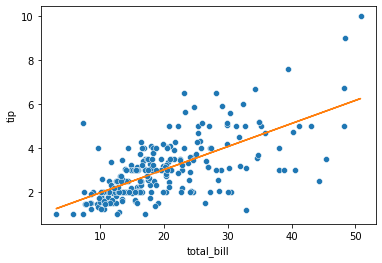

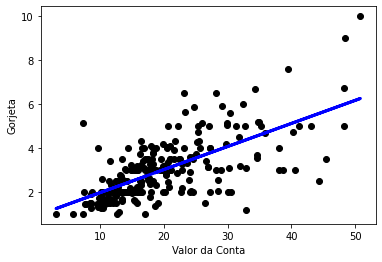

In [418]:
# Plotar com scatterplot
plt.scatter(x, y,  color='black')
plt.plot(x, y_pred_model, color='blue', linewidth=3)
plt.xlabel('Valor da Conta')
plt.ylabel('Gorjeta')
plt.show()

# === Desafio === 
1. Para o mesmo conjunto de dados de gorjetas, treine um modelo de regressão linear implementando o algoritmo de gradiente descendente utilizando Numpy. Pode ser utilizado o gradiente descendente em batch ou o estocástico.
2. Crie um gráfico que mostre o valor da função custo decaindo após cada iteração do treinamento. Plote ao menos 3 exemplos de treinamento com diferentes passos de aprendizagem. E.g.:
3. Mostre as mesmas informações pedidas nas questões anteriores sobre a regressão linear criada com scikit-learn: MSE, pesos, predição para o valor 30 e o plot da reta aprendida. Compare com os resultados do modelo treinado com o scikit-learn.


# Gradiente descedente Estocástico

### Questão 1
Para o mesmo conjunto de dados de gorjetas, treine um modelo de regressão linear implementando o algoritmo de gradiente descendente utilizando Numpy. Pode ser utilizado o gradiente descendente em batch ou o estocástico.

In [419]:
X = df['total_bill']
y = df['tip']
#Definindo a função custo
def  cal_cost(theta,X,y):
    
    m = len(y)
    
    predictions = X.dot(theta)
    cost = (1/2*m) * np.sum(np.square(predictions-y)) #Definição do cálculo da função de custo
    return cost

In [420]:
def stocashtic_gradient_descent(X,y,theta,learning_rate=0.01,iterations=10):
    m = len(y)
    cost_history = np.zeros(iterations)
    
    
    for it in range(iterations): #qtd de vezes que passa pelos dados
        cost =0.0
        for i in range(m): #Vai de dado em dado
            rand_ind = np.random.randint(0,m) #definindo dado aleatório randomicamente
            X_i = X[rand_ind,:].reshape(1,X.shape[1]) #entrada randômica
            y_i = y[rand_ind].reshape(1,1) #saída randômica
            prediction = np.dot(X_i,theta) #multiplicação 

            theta = theta -(1/m)*learning_rate*( X_i.T.dot((prediction - y_i))) #atualizando os coeficientes(pesos)
            cost += cal_cost(theta,X_i,y_i)
        cost_history[it]  = cost
        
    return theta, cost_history

### Questão 2
Crie um gráfico que mostre o valor da função custo decaindo após cada iteração do treinamento. Plote ao menos 3 exemplos de treinamento com diferentes passos de aprendizagem.

In [421]:
lr =0.0001 #Definindo a taxa de aprendizagem
n_iter1 = 100 #Definindo número de interações

theta = np.random.randn(2,1) #Gerando o teta(pesos) randomicamente

X_b = np.c_[np.ones((len(X),1)),X] #Criando uma matriz de 1's para fazer a multiplicação com o peso w0
theta,cost_history1 = stocashtic_gradient_descent(X_b,y,theta,lr,n_iter1)


print('Theta0:          {:0.3f}\nTheta1:          {:0.3f}'.format(theta[0][0],theta[1][0]))
print('Final cost/MSE:  {:0.3f}'.format(cost_history1[-1]))

Theta0:          0.748
Theta1:          0.128
Final cost/MSE:  139.050


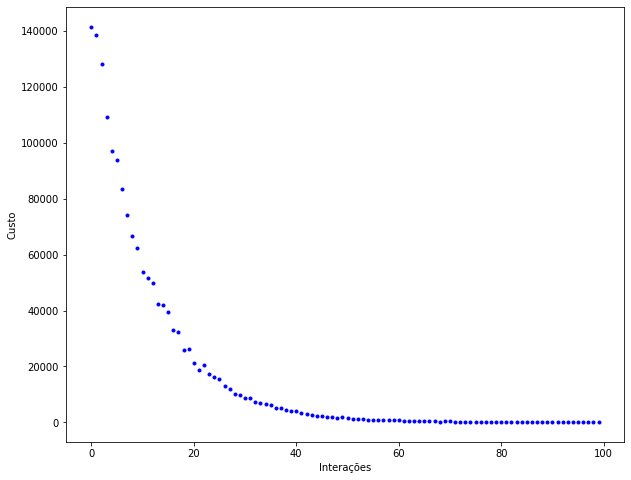

In [422]:
fig,ax = plt.subplots(figsize=(10,8))

ax.set_ylabel('Custo')
ax.set_xlabel('Interações')

ax.plot(range(n_iter1),cost_history1,'b.');

In [423]:
lr =0.001 #Definindo a taxa de aprendizagem
n_iter2 = 100 #Definindo número de interações

theta = np.random.randn(2,1) #Gerando o teta(pesos) randomicamente

X_b = np.c_[np.ones((len(X),1)),X]#Criando uma matriz de 1's para fazer a multiplicação com o peso w0
theta,cost_history2 = stocashtic_gradient_descent(X_b,y,theta,lr,n_iter2)


print('Theta0:          {:0.3f}\nTheta1:          {:0.3f}'.format(theta[0][0],theta[1][0]))
print('Final cost/MSE:  {:0.3f}'.format(cost_history2[-1]))

Theta0:          -0.431
Theta1:          0.164
Final cost/MSE:  150.870


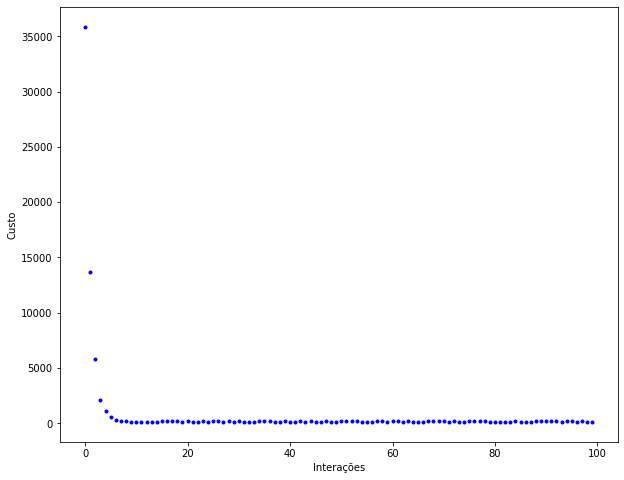

In [424]:
fig,ax = plt.subplots(figsize=(10,8))

ax.set_ylabel('Custo')
ax.set_xlabel('Interações')


ax.plot(range(n_iter2),cost_history2,'b.');

In [425]:
lr =0.0003 #Definindo taxa de aprendizagem
n_iter3 = 100 #Definindo número de interações

theta = np.random.randn(2,1) #Gerando o teta(pesos) randomicamente

X_b = np.c_[np.ones((len(X),1)),X]#Criando uma matriz de 1's para fazer a multiplicação com o peso w0
theta,cost_history3 = stocashtic_gradient_descent(X_b,y,theta,lr,n_iter3)


print('Theta0:          {:0.3f}\nTheta1:          {:0.3f}'.format(theta[0][0],theta[1][0]))
print('Final cost/MSE:  {:0.3f}'.format(cost_history3[-1]))

Theta0:          2.401
Theta1:          0.044
Final cost/MSE:  197.092


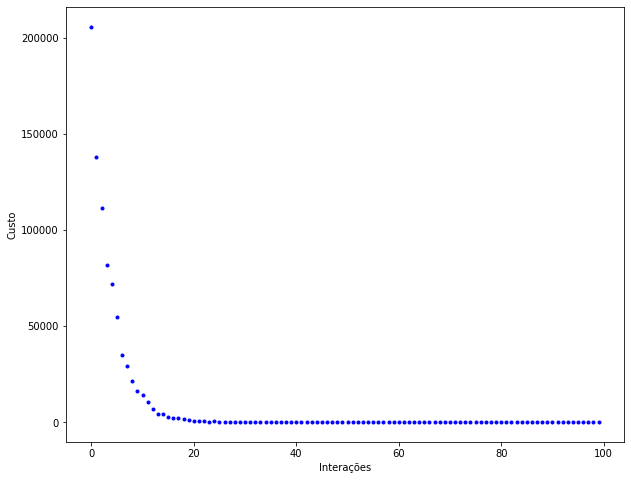

In [426]:
fig,ax = plt.subplots(figsize=(10,8))

ax.set_ylabel('Custo')
ax.set_xlabel('Interações')

ax.plot(range(n_iter3),cost_history3,'b.');

# PARTE 2 - Regressão Linear Múltipla
Considere o conjunto de dados disponibilizado neste link. Os dados referem-se às casas encontradas em um determinado distrito da Califórnia e a algumas estatísticas resumidas sobre elas com base nos dados do censo de 1990. Considere que haja um problema de regressão no qual desejamos criar um modelo que faça a predição do valor mediano das casas de um distrito ('median_house_value') com base em outras informações. Crie pelo menos 3 modelos que façam essa predição utilizando mais de uma variável de entrada e compare a diferença de MSE. Qual o melhor modelo encontrado? Justifique a escolha das variáveis.

In [427]:
df_house = pd.read_csv('california_housing_train.csv')
df_house

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0


In [428]:
df_house.describe();

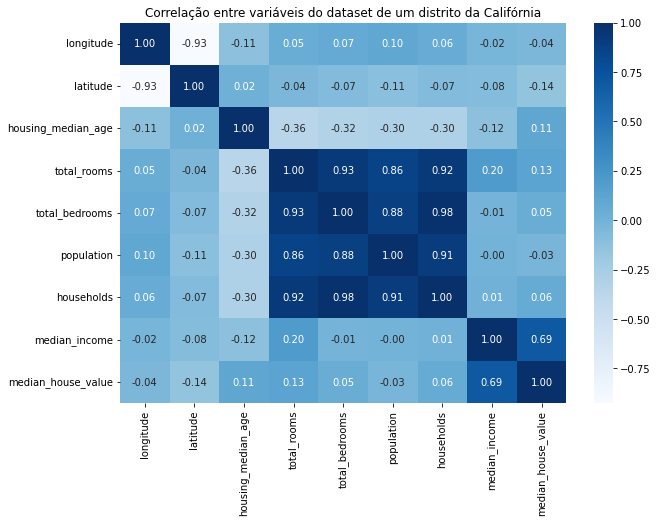

In [429]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 7))
sns.heatmap(df_house.corr(),
            annot = True,
            fmt = '.2f',#deixando em duas casas decimais
            cmap='Blues')
plt.title('Correlação entre variáveis do dataset de um distrito da Califórnia')
plt.show()

### Modelo 1
No primeiro modelo escolhido, as features de entrada serão: 'media_income' e 'hounsing_median_age' por apresentarem na matriz de correlação, uma correlação relevante com a variável de saída 'median_house_value'.

In [430]:
X = df_house[['median_income','housing_median_age']]
y = df_house['median_house_value']

In [431]:
# criando e treinando o modelo
model = LinearRegression()
model.fit(X, y)
# Construindo a predição do modelo
y_pred_model = model.predict(X)

In [432]:
#Erro médio quadrático

print('Erro médio quadrático: %.2f' % mean_squared_error(y_pred_model,y))
print('Raiz do erro médio quadrático: %.2f' % mean_squared_error(y_pred_model,y,squared=False))
#Imprimindo Coeficiente de interceptação, ou seja, peso w0.
w0 = model.intercept_
print(f'Coeficiente de interceptação(Peso w0): {w0:.4f}')

#Imprimindo Coeficiente de Inclinação, ou seja, peso w1.
w1 = model.coef_
print(f'Coeficiente de inclinação(Peso w1):  {w1.round(5)}')

print('Coeficiente de determinação:', model.score(X, y))

Erro médio quadrático: 6535814191.46
Raiz do erro médio quadrático: 80844.38
Coeficiente de interceptação(Peso w0): -11131.3643
Coeficiente de inclinação(Peso w1):  [43389.52463  1746.30287]
Coeficiente de determinação: 0.5141179623105907


### Modelo 2
Aqui utilizarei todas as features possíveis como entrada para ver o comportamento do modelo com todas elas como entrada.
Obviamente, tendo como saída a predição valor mediano das casas de um distrito ('median_house_value').


In [433]:
X = df_house.drop(['median_house_value'], axis = 1) 
y = df_house.median_house_value #Definindo somente a 'median_house_value' como saída
X;

In [434]:
# criando e treinando o modelo
model = LinearRegression()
model.fit(X, y)
# Construindo a predição do modelo
y_pred_model = model.predict(X)

In [435]:
#Erro médio quadrático
print('Erro médio quadrático: %.2f' % mean_squared_error(y_pred_model,y))
print('Raiz do erro médio quadrático: %.2f' % mean_squared_error(y_pred_model,y,squared=False))
#Imprimindo Coeficiente de interceptação, ou seja, peso w0.
w0 = model.intercept_
print(f'Coeficiente de interceptação(Peso w0): {w0:.4f}')

#Imprimindo Coeficiente de Inclinação, ou seja, peso w1.
w1 = model.coef_
print(f'Coeficiente de inclinação(Peso w1):  {w1.round(5)}')

print('Coeficiente de determinação:', model.score(X, y))

Erro médio quadrático: 4824523173.93
Raiz do erro médio quadrático: 69458.79
Coeficiente de interceptação(Peso w0): -3620600.8930
Coeficiente de inclinação(Peso w1):  [-4.31396373e+04 -4.29256731e+04  1.15069493e+03 -8.37825000e+00
  1.17648540e+02 -3.84887700e+01  4.54360000e+01  4.05070684e+04]
Coeficiente de determinação: 0.6413378529502689


### Modelo 3
Aplicando o Recursive Feature Elimination - RFE para definição das features escolhidas:
- O RFE constrói modelos à partir da remoções de features
- Utiliza a acurácia do modelo para identificar atributos ou a combinação destes que melhor contribui para se ter uma melhor perfomance 
- Em grandes bases de dados o tempo de processamento pode ser um problema 

In [436]:
from sklearn.feature_selection import RFE
X = df_house.drop(['median_house_value'], axis = 1)
y = df_house.median_house_value
X;
model = LinearRegression()
rfe = RFE(model, n_features_to_select=4) #Definindo a quantidade de atributos(features) que devem ser selecionadas pelo RFE e também a instanciação, no caso o model(regressão linear)

In [437]:
fit = rfe.fit(X,y) #Entregando os dados para o rfe, que vai fazer a criação do modelo e fazer os testes levando em consideração, a acurácia. Definindo isso tudo na variável fit

In [438]:
print("Número de features escolhidas: {}".format(fit.n_features_))

Número de features escolhidas: 4


In [439]:
colunas = fit.get_support(indices=True) 
df_house.iloc[:,colunas] #imprimindo o df_house trazendo as features que o método RFE considera como as melhores

,longitude,latitude,housing_median_age,median_income
0,-114.31,34.19,15.0,1.4936
1,-114.47,34.40,19.0,1.8200
2,-114.56,33.69,17.0,1.6509
3,-114.57,33.64,14.0,3.1917
4,-114.57,33.57,20.0,1.9250
...,...,...,...,...
16995,-124.26,40.58,52.0,2.3571
16996,-124.27,40.69,36.0,2.5179
16997,-124.30,41.84,17.0,3.0313
16998,-124.30,41.80,19.0,1.9797


In [440]:
# Redefinindo as entradas à partir da filtragem com o RFE
X = df_house.iloc[:,colunas]
y = df_house['median_house_value']

In [441]:
# criando e treinando o modelo
model = LinearRegression()
model.fit(X, y)
# Construindo a predição do modelo
y_pred_model = model.predict(X)

In [442]:
#Erro médio quadrático
print('Erro médio quadrático: %.2f' % mean_squared_error(y_pred_model,y))
#Imprimindo Coeficiente de interceptação, ou seja, peso w0.
w0 = model.intercept_
print(f'Coeficiente de interceptação(Peso w0): {w0:.4f}')

#Imprimindo Coeficiente de Inclinação, ou seja, peso w1.
w1 = model.coef_
print(f'Coeficiente de inclinação(Peso w1):  {w1.round(5)}')

print('Coeficiente de determinação:', model.score(X, y))

Erro médio quadrático: 5406096300.11
Coeficiente de interceptação(Peso w0): -3791572.4718
Coeficiente de inclinação(Peso w1):  [-45241.04705 -44497.77956    953.27001  38044.41152]
Coeficiente de determinação: 0.5981028515659096


##### Tendo como base, o erro quadrático médio e o coeficiente de determinação como complemento, o modelo que apresentou o melhor resultado, foi o Modelo 2, em que utilizei como entrada, todas as features disponíveis (comentar sobre isso). A sequência, ficou:
##### 1. Modelo 2 
##### 2. Modelo 3
##### 3. Modelo 1

# PARTE 3 - Regressão Polinomial
Considerando o mesmo problema tratado na Parte 2, treine modelos de regressão utilizando transformações não-lineares dos atributos (x², x³, etc...). Pode-se utilizar transformações em um ou mais atributos. Treine pelo menos 3 modelos diferentes e faça o plot das curvas de regressão comparada com o scatterplot (análogo ao que foi feito na questão 5 da Parte 1). Calcule o MSE para cada um dos modelos. Qual modelo se ajustou melhor aos dados em termos de MSE?


### Modelo 1
Utilizarei como entradas, as features: 'media_income' e 'hounsing_median_age' por apresentarem na matriz de correlação, uma correlação relevante com a variável de saída 'median_house_value'.


In [443]:
X = df_house[['median_income','housing_median_age']]
y = df_house['median_house_value']

X_poly = np.hstack((X,X**2,X**3))

model = LinearRegression()

model.fit(X_poly,y)

y_pred_model = model.predict(X_poly)

#Erro médio quadrático
print('Erro médio quadrático: %.2f' % mean_squared_error(y_pred_model,y))
#Imprimindo Coeficiente de interceptação, ou seja, peso w0.
w0 = model.intercept_
print(f'Coeficiente de interceptação(Peso w0): {w0}')

#Imprimindo Coeficiente de Inclinação, ou seja, peso w1.
w1 = model.coef_
print(f'Coeficiente de inclinação(Peso w1):  {w1.round(5)}')

print('Coeficiente de determinação:', model.score(X_poly, y))

Erro médio quadrático: 6272560971.92
Coeficiente de interceptação(Peso w0): -5354.829441326321
Coeficiente de inclinação(Peso w1):  [ 1.82512279e+04  5.44772642e+03  6.05165255e+03 -1.72856200e+02
 -3.70943180e+02  2.23936000e+00]
Coeficiente de determinação: 0.5336885937561535


### Modelo 2
Utilizarei como entradas, as features que com a aplicação do método RFE, foram consideradas melhores, sendo elas: 'longitude','latitude','housing_median_age','median_income'

In [444]:
# Redefinindo as entradas à partir da filtragem com o RFE
X = df_house.iloc[:,colunas]
y = df_house['median_house_value']
X_poly = np.hstack((X,X**2,X**3))

model = LinearRegression()

model.fit(X_poly,y)

y_pred_model = model.predict(X_poly)

#Erro médio quadrático
print('Erro médio quadrático: %.2f' % mean_squared_error(y_pred_model,y))
#Imprimindo Coeficiente de interceptação, ou seja, peso w0.
w0 = model.intercept_
print(f'Coeficiente de interceptação(Peso w0): {w0}')

#Imprimindo Coeficiente de Inclinação, ou seja, peso w1.
w1 = model.coef_
print(f'Coeficiente de inclinação(Peso w1):  {w1.round(5)}')

print('Coeficiente de determinação:', model.score(X_poly, y))

Erro médio quadrático: 5113703578.26
Coeficiente de interceptação(Peso w0): 873600528.1546502
Coeficiente de inclinação(Peso w1):  [ 2.28375953e+07  2.23089642e+06  4.83220740e+03  4.68405219e+03
  1.92994576e+05 -6.46935756e+04 -1.96505030e+02  6.97399820e+03
  5.42288240e+02  6.09926490e+02  2.64548000e+00 -3.87345460e+02]
Coeficiente de determinação: 0.6198397564620397


### Modelo 3
No primeiro modelo escolhido, a feature de entrada será: 'media_income'

In [445]:
X = df_house['median_income'].values.reshape(-1,1)
y = df_house['median_house_value'].values.reshape(-1,1)

X_poly = np.hstack((X,X**2,X**3))

model = LinearRegression()

model.fit(X_poly,y)

y_pred_model = model.predict(X_poly)

#Erro médio quadrático
print('Erro médio quadrático: %.2f' % mean_squared_error(y_pred_model,y))
#Imprimindo Coeficiente de interceptação, ou seja, peso w0.
w0 = model.intercept_
print(f'Coeficiente de interceptação(Peso w0): {w0}')

#Imprimindo Coeficiente de Inclinação, ou seja, peso w1.
w1 = model.coef_
print(f'Coeficiente de inclinação(Peso w1):  {w1.round(5)}')

print('Coeficiente de determinação:', model.score(X_poly, y))



Erro médio quadrático: 6844400238.89
Coeficiente de interceptação(Peso w0): [75138.94311659]
Coeficiente de inclinação(Peso w1):  [[15095.08877  6050.3056   -353.91044]]
Coeficiente de determinação: 0.49117722177908874


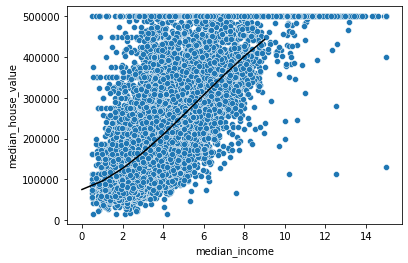

In [446]:
sns.scatterplot(x='median_income', y='median_house_value', data=df_house)
x = np.arange(0,10).reshape(-1,1)
x = np.hstack((x,x**2,x**3))
y_pred_model = model.predict(x).flatten()
plt.plot(np.arange(0,10), y_pred_model, color='black');

##### Tendo como base, o erro quadrático médio e o coeficiente de determinação como complemento, o modelo que apresentou o melhor resultado, foi o Modelo 2, em que utilizei como entrada,as features que com a aplicação do método RFE, foram consideradas melhores, sendo elas: 'longitude','latitude','housing_median_age','median_income'. A sequência, ficou:
##### 1. Modelo 2 
##### 2. Modelo 1
##### 3. Modelo 3

# Parte 4 - Generalização, regularização e normalização
Considere o conjunto de dados utilizado nas partes 2 e 3 de preços de casas na Califórnia. Data de entrega: 04/12

Utilizando um método da validação cruzada (conjuntos de treino, validação e teste) experimente diferentes métodos de: 
- engenharia de atributos (seleção de atributos, atributos polinomiais, normalização)  
- escolha de hiperparâmetros (passo de aprendizagem, coeficiente de regularização, número de iterações) 

Treine no conjunto de treino e avalie no conjunto de validação. Avalie pelo menos 5 abordagens candidatas. 

Ao final, avalie como o seu melhor modelo performa no conjunto de teste e apresente o resultado.

Dica¹: utilize as classes SGDRegressor ou Ridge do scikitlearn.

Dica²: normalize os dados de entrada e saída

Dica³: tente utilizar grid search e/ou k-fold

In [447]:
df_house = pd.read_csv('california_housing_train.csv')
df_house

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0


### Modelo 1 -- Ajustando Hiperparâmetros
Utilizarei como entradas, as features: 'media_income' e 'hounsing_median_age' por apresentarem na matriz de correlação, uma correlação relevante com a variável de saída 'median_house_value'.

As características de cada modelo serão apresentadas no decorrer de sua construção.

In [448]:
#Importando do sciki-learn os métodos voltados para regressão
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [449]:
X = df_house[['median_income','housing_median_age']]
y = df_house['median_house_value'].to_numpy().reshape(-1,1)

In [450]:
x_train_val, x_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2,)
print('Treino & Validação:', x_train_val.shape)
print('Teste:', x_test.shape)
#  80% de 'treino_validação' para treino e os 20% restantes para validação
x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val, test_size=0.2,)
print('Somente Treino', x_train.shape)
print('Somente Validação:', x_val.shape)

Treino & Validação: (13600, 2)
Teste: (3400, 2)
Somente Treino (10880, 2)
Somente Validação: (2720, 2)


Normalizando os dados de treino e validação

- Dimensionador Mín-Máx

In [451]:
#Utilizando o método de MinMAx do sklearn
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler ()
#Normalizando os dados de treino e validação
x_train_norm = scaler.fit_transform(x_train) 
x_val_norm = scaler.transform(x_val) 
y_train_norm = scaler.fit_transform(y_train).reshape(-1,1) 
y_val_norm = scaler.transform(y_val)

In [452]:
#Outra maneira de fazer a normalização Min Max utilizando uma função que faz o cálculo diretamente
def normalize(x):
    return ((x - min(x)) / (max(x) - min(x)))

In [453]:
#Definindo alguns hiperparâmetros para o modelo
#eta0: A taxa de aprendizagem inicial para os planejamentos "constante", "escalonamento" ou "adaptativo". O valor padrão é 0,01.
#alpha: Constante que multiplica o prazo de regularização. Quanto maior o valor, mais forte é a regularização. Também usado para calcular a taxa de aprendizagem quando definido como learning_rate é definido como ‘ideal’.
#O SGDRegressor já tem como default a regularização L2
model = SGDRegressor(alpha=0.0001, eta0=0.1)
model.fit(x_train_norm,y_train_norm.ravel())
y_pred = model.predict(x_val_norm).reshape(-1,1)

In [454]:
#Trazendo novamente para a escala original dos dados
y_pred_real1 = scaler.inverse_transform(y_pred)

In [455]:
#Erro médio quadrático
modelo1 = mean_squared_error(y_val,y_pred_real)
print('Erro médio quadrático: %.2f' % mean_squared_error(y_val,y_pred_real))
#Imprimindo Coeficiente de interceptação, ou seja, peso w0.
w0 = model.intercept_
print(f'Coeficiente de interceptação(Peso w0): {w0}')

#Imprimindo Coeficiente de Inclinação, ou seja, peso w1.
w1 = model.coef_
print(f'Coeficiente de inclinação(Peso w1):  {w1.round(5)}')

print('Coeficiente de determinação:', model.score(x_train_norm, y_train_norm))


Erro médio quadrático: 20032239438.38
Coeficiente de interceptação(Peso w0): [-0.02625713]
Coeficiente de inclinação(Peso w1):  [1.28715 0.18019]
Coeficiente de determinação: 0.5063575249433763


### Modelo 2 --- GridSearchCV 
Aqui utilizarei todas as features possíveis como entrada para ver o comportamento do modelo com todas elas como entrada. Obviamente, tendo como saída a predição valor mediano das casas de um distrito ('median_house_value').

As características de cada modelo serão apresentadas no decorrer de sua construção.

In [456]:
X = df_house.drop(['median_house_value'], axis = 1) 
y = df_house.median_house_value.to_numpy().reshape(-1,1) #Definindo somente a 'median_house_value' como saída

In [457]:
x_train_val, x_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2,)
print('Treino & Validação:', x_train_val.shape)
print('Teste:', x_test.shape)
#  80% de 'treino_validação' para treino e os 20% restantes para validação
x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val, test_size=0.2,)
print('Somente Treino', x_train.shape)
print('Somente Validação:', x_val.shape)

Treino & Validação: (13600, 8)
Teste: (3400, 8)
Somente Treino (10880, 8)
Somente Validação: (2720, 8)


In [458]:
#Utilizando o método de MinMAx do sklearn
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler ()
#Normalizando os dados de treino e validação
x_train_norm = scaler.fit_transform(x_train) 
x_val_norm = scaler.transform(x_val) 
y_train_norm = scaler.fit_transform(y_train).reshape(-1,1) 
y_val_norm = scaler.transform(y_val)

In [459]:
model2 = SGDRegressor()
#Olhando os parâmetros do SGDRegressor 
model2.get_params().keys()

dict_keys(['alpha', 'average', 'early_stopping', 'epsilon', 'eta0', 'fit_intercept', 'l1_ratio', 'learning_rate', 'loss', 'max_iter', 'n_iter_no_change', 'penalty', 'power_t', 'random_state', 'shuffle', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [460]:
# Definindo os parâmetros que serão utilizados no GridSearchCV
model2_params = {
    #Utilizando essa potenciação pra deixar o alpha sempre naquela vibe de taxa mesmo, só que dando esse intervalo para o gread trabalhar
    #O restante dos parâmetros foram definidos de acordo com a documentação
    'alpha': 10.0 ** -np.arange(1, 7),
    'loss': ['squared_loss', 'huber', 'epsilon_insensitive'],
    'penalty': ['l2', 'l1', 'elasticnet'],
    'learning_rate': ['constant', 'optimal', 'invscaling'],
}

In [461]:
from sklearn.model_selection import GridSearchCV
# Definir uma lista de métricas, sendo a mais importante a do erro quadrático == neg_mean_squared_log_error
# Link das métricas: https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
metricas = ['explained_variance', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'r2']
#  verbose=100 pra ele ir falando o que ele tá fazendo passo a passo
# No refit significa que ele vai escolher o modelo com o menor erro quadrado médio. Por último estou pedindo para não retornar os scores de treinamento.
meu_primeiro_grid = GridSearchCV(model2, param_grid=model2_params, scoring=metricas,verbose=0,refit='neg_mean_squared_error', return_train_score=False)

In [462]:
meu_primeiro_grid.fit(x_train_norm,y_train_norm.ravel())

c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 87, in __call__
    score = scorer._score(cached_call, estimator,
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "c:\users

GridSearchCV(estimator=SGDRegressor(),
             param_grid={'alpha': array([1.e-01, 1.e-02, 1.e-03, 1.e-04, 1.e-05, 1.e-06]),
                         'learning_rate': ['constant', 'optimal', 'invscaling'],
                         'loss': ['squared_loss', 'huber',
                                  'epsilon_insensitive'],
                         'penalty': ['l2', 'l1', 'elasticnet']},
             refit='neg_mean_squared_error',
             scoring=['explained_variance', 'neg_mean_absolute_error',
                      'neg_mean_squared_error', 'neg_mean_squared_log_error',
                      'neg_median_absolute_error', 'r2'])

In [463]:
meu_primeiro_grid.best_estimator_
#Então os ajustes definidos para os hiperparâmetros após a aplicação do GridSearch, foram esses:

SGDRegressor(alpha=0.001, learning_rate='optimal', loss='huber', penalty='l1')

In [464]:
# Como eu defini o neg_mean_squared_error no refit, ele está devolvendo o melhor score dessa métrica. Essa métrica é o erro quadrado médio, só que negativa. 
#Acho que é pra ficar mais fácil de minimizar, aí eles adotam o padrão de colocar as métricas tudo negativa. 
meu_primeiro_grid.best_score_

-0.02551573247039073

In [465]:
# Achei que a melhor forma de lidar com isso é tirando a raiz da métrica(até pelo fato de ser o erro quadrático), após aplicar esse passo, temos o erro.
np.sqrt(meu_primeiro_grid.best_score_*-1)

0.15973644690674302

In [466]:
#  O Grid Search retorna um dicionário com todos os resultados, transformei ele em um dataframe pra ficar mais fácil de ver
pd.DataFrame(meu_primeiro_grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_learning_rate,param_loss,param_penalty,params,split0_test_explained_variance,...,std_test_neg_median_absolute_error,rank_test_neg_median_absolute_error,split0_test_r2,split1_test_r2,split2_test_r2,split3_test_r2,split4_test_r2,mean_test_r2,std_test_r2,rank_test_r2
0,0.003782,0.000747,0.001590,0.000491,0.1,constant,squared_loss,l2,"{'alpha': 0.1, 'learning_rate': 'constant', 'l...",1.536575e-01,...,0.009035,61,0.099033,0.144268,0.142929,0.141070,0.162261,0.137912,0.020880,50
1,0.005800,0.002240,0.002378,0.000808,0.1,constant,squared_loss,l1,"{'alpha': 0.1, 'learning_rate': 'constant', 'l...",-2.220446e-16,...,0.004101,71,-0.005760,-0.001521,-0.001986,-0.001640,-0.000766,-0.002335,0.001758,59
2,0.004299,0.000400,0.001731,0.000407,0.1,constant,squared_loss,elasticnet,"{'alpha': 0.1, 'learning_rate': 'constant', 'l...",3.593689e-02,...,0.002403,66,0.024105,0.047129,0.034530,0.045779,0.043752,0.039059,0.008677,53
3,0.004000,0.000013,0.001300,0.000259,0.1,constant,huber,l2,"{'alpha': 0.1, 'learning_rate': 'constant', 'l...",6.002454e-02,...,0.001788,47,-0.021660,-0.003472,0.023665,-0.004064,0.022945,0.003483,0.017456,56
4,0.004588,0.000476,0.001731,0.000405,0.1,constant,huber,l1,"{'alpha': 0.1, 'learning_rate': 'constant', 'l...",-2.220446e-16,...,0.003458,60,-0.046294,-0.037243,-0.025073,-0.053394,-0.068554,-0.046112,0.014683,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,0.007379,0.001354,0.001635,0.000539,0.000001,invscaling,huber,l1,"{'alpha': 1e-06, 'learning_rate': 'invscaling'...",2.645306e-01,...,0.002287,29,0.226215,0.236753,0.233183,0.230513,0.233766,0.232086,0.003543,36
158,0.006596,0.000486,0.001649,0.000558,0.000001,invscaling,huber,elasticnet,"{'alpha': 1e-06, 'learning_rate': 'invscaling'...",2.642171e-01,...,0.001708,28,0.215944,0.233654,0.226924,0.231262,0.236223,0.228802,0.007121,42
159,0.007284,0.000398,0.001490,0.000467,0.000001,invscaling,epsilon_insensitive,l2,"{'alpha': 1e-06, 'learning_rate': 'invscaling'...",NaN,...,NaN,88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,88
160,0.008784,0.000395,0.001383,0.000486,0.000001,invscaling,epsilon_insensitive,l1,"{'alpha': 1e-06, 'learning_rate': 'invscaling'...",NaN,...,NaN,159,NaN,NaN,NaN,NaN,NaN,NaN,NaN,159


In [467]:
y_pred2 = meu_primeiro_grid.predict(x_val_norm).reshape(-1,1)

In [468]:
#Trazendo novamente para a escala original dos dados
y_pred_real = scaler.inverse_transform(y_pred2)

In [469]:
#Erro médio quadrático
modelo2 = mean_squared_error(y_val,y_pred_real)
print('Erro médio quadrático: %.2f' % mean_squared_error(y_val,y_pred_real))
#Imprimindo Coeficiente de interceptação, ou seja, peso w0.
w0 = model.intercept_
print(f'Coeficiente de interceptação(Peso w0): {w0}')

#Imprimindo Coeficiente de Inclinação, ou seja, peso w1.
w1 = model.coef_
print(f'Coeficiente de inclinação(Peso w1):  {w1.round(5)}')


Erro médio quadrático: 6418687048.27
Coeficiente de interceptação(Peso w0): [-0.02625713]
Coeficiente de inclinação(Peso w1):  [1.28715 0.18019]


### Modelo 3 --- Cross Validation(K Fold) 
Utilizarei como entradas, as features que com a aplicação do método RFE, foram consideradas melhores, sendo elas: 'longitude','latitude','housing_median_age','median_income'

In [470]:
X = df_house[['longitude','latitude','median_income','housing_median_age']]
y = df_house['median_house_value'].to_numpy().reshape(-1,1)

In [471]:
x_train_val, x_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2,)
print('Treino & Validação:', x_train_val.shape)
print('Teste:', x_test.shape)
#  80% de 'treino_validação' para treino e os 20% restantes para validação
x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val, test_size=0.2,)
print('Somente Treino', x_train.shape)
print('Somente Validação:', x_val.shape)

Treino & Validação: (13600, 4)
Teste: (3400, 4)
Somente Treino (10880, 4)
Somente Validação: (2720, 4)


In [472]:
#Utilizando o método de MinMAx do sklearn
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler ()
#Normalizando os dados de treino e validação
x_train_norm = scaler.fit_transform(x_train) 
x_val_norm = scaler.transform(x_val) 
y_train_norm = scaler.fit_transform(y_train).reshape(-1,1) 
y_val_norm = scaler.transform(y_val)

In [473]:
model3 = SGDRegressor()
model.fit(x_train_norm,y_train_norm.ravel())
y_pred = model.predict(x_val_norm).reshape(-1,1)

In [474]:
from sklearn.model_selection import KFold, cross_val_score
# Criando um KFold e dividindo em 5 fatias o conjunto
#Coeficiente de Determinação
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
result = cross_val_score(model3, x_train_norm, y_train_norm.ravel(), scoring='r2', cv=folds)
result

array([0.51434782, 0.513327  , 0.49469015, 0.51258196, 0.50419307])

In [475]:
# Criando um KFold e dividindo em 5 fatias o conjunto
#Utilizando erro médio quadrático
result2 = cross_val_score(model3, x_train_norm, y_train_norm.ravel(), scoring='neg_mean_squared_error', cv=folds)
print(result2)
print(np.sqrt(result2*-1))
#outra opção de resolução do negativo
result2 = -result2
print(result2)

[-0.02706345 -0.02864037 -0.0297034  -0.027472   -0.02780061]
[0.16450973 0.16923465 0.17234673 0.16574678 0.16673516]
[0.02706345 0.02864037 0.0297034  0.027472   0.02780061]


### Modelo 4 --- GridSearchCv e Cross Validation(K Fold) 
Utilizarei como entradas, as features escolhidas após a aplicação do método RFE.

In [476]:
X = df_house.drop(['median_house_value'], axis = 1)
y = df_house.median_house_value.to_numpy().reshape(-1,1)

In [477]:
x_train_val, x_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2,)
print('Treino & Validação:', x_train_val.shape)
print('Teste:', x_test.shape)
#  80% de 'treino_validação' para treino e os 20% restantes para validação
x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val, test_size=0.2,)
print('Somente Treino', x_train.shape)
print('Somente Validação:', x_val.shape)

Treino & Validação: (13600, 8)
Teste: (3400, 8)
Somente Treino (10880, 8)
Somente Validação: (2720, 8)


In [478]:
#Utilizando o método de MinMAx do sklearn
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler ()
#Normalizando os dados de treino e validação
x_train_norm = scaler.fit_transform(x_train) 
x_val_norm = scaler.transform(x_val) 
y_train_norm = scaler.fit_transform(y_train).reshape(-1,1) 
y_val_norm = scaler.transform(y_val)

In [479]:
model4 = SGDRegressor()
model4.fit(x_train_norm,y_train_norm.ravel())

SGDRegressor()

In [480]:
# Criando um esquema de validação cruzada
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

# Especificando a quantidadede de features que podem ser escolhidas, de 1 a 4.
#hyper_params = [{'n_features_to_select': list(range(1, 5))}]

rfe = RFE(model4, n_features_to_select=4)

# Aplicando a GridSearchCV tendo como estimador, o RFE
meu_segundo_grid = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'neg_mean_squared_error', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=False)

In [481]:
# Treinando o modelo após a aplicação do Grid e da validação
meu_segundo_grid.fit(x_train_norm, y_train_norm.ravel()) 

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=RFE(estimator=SGDRegressor(), n_features_to_select=4),
             param_grid=[{'n_features_to_select': [1, 2, 3, 4]}],
             scoring='neg_mean_squared_error', verbose=1)

In [482]:
print(meu_segundo_grid.best_score_)
print(np.sqrt(meu_segundo_grid.best_score_*-1))

-0.02868127716396789
0.16935547574249818


In [483]:

cv_resultados = pd.DataFrame(meu_segundo_grid.cv_results_)
cv_resultados

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.059693,0.005083,0.000598,0.000489,1,{'n_features_to_select': 1},-0.033139,-0.033686,-0.031717,-0.033557,-0.032030,-0.032826,0.000804,4
1,0.051416,0.002960,0.000400,0.000490,2,{'n_features_to_select': 2},-0.031741,-0.032370,-0.030274,-0.031958,-0.031587,-0.031586,0.000707,3
2,0.047954,0.002568,0.000798,0.000399,3,{'n_features_to_select': 3},-0.031024,-0.031564,-0.029669,-0.031329,-0.029758,-0.030669,0.000799,2
3,0.041624,0.002630,0.000200,0.000399,4,{'n_features_to_select': 4},-0.029233,-0.029592,-0.027686,-0.029319,-0.027577,-0.028681,0.000866,1


In [484]:
y_pred4 = meu_segundo_grid.predict(x_val_norm).reshape(-1,1)

In [485]:
#Trazendo novamente para a escala original dos dados
y_pred_real = scaler.inverse_transform(y_pred4)

In [486]:
#Erro médio quadrático
modelo4 = mean_squared_error(y_val,y_pred_real)
print('Erro médio quadrático: %.2f' % mean_squared_error(y_val,y_pred_real))
#Imprimindo Coeficiente de interceptação, ou seja, peso w0.
w0 = model.intercept_
print(f'Coeficiente de interceptação(Peso w0): {w0}')

#Imprimindo Coeficiente de Inclinação, ou seja, peso w1.
w1 = model.coef_
print(f'Coeficiente de inclinação(Peso w1):  {w1.round(5)}')

Erro médio quadrático: 6607534635.35
Coeficiente de interceptação(Peso w0): [0.58058357]
Coeficiente de inclinação(Peso w1):  [-0.67596 -0.63788  1.18979  0.11268]


### Modelo 5 --- GridSearchCV
Utilizarei como entradas, as features: 'media_income' e 'total_rooms' por apresentarem na matriz de correlação, uma correlação relevante com a variável de saída 'median_house_value'.

As características de cada modelo serão apresentadas no decorrer de sua construção.

In [487]:
X = df_house[['median_income','total_rooms']]
y = df_house['median_house_value'].to_numpy().reshape(-1,1)


In [488]:
x_train_val, x_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2,)
print('Treino & Validação:', x_train_val.shape)
print('Teste:', x_test.shape)
#  80% de 'treino_validação' para treino e os 20% restantes para validação
x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val, test_size=0.2,)
print('Somente Treino', x_train.shape)
print('Somente Validação:', x_val.shape)

Treino & Validação: (13600, 2)
Teste: (3400, 2)
Somente Treino (10880, 2)
Somente Validação: (2720, 2)


In [489]:
#Utilizando o método de MinMAx do sklearn
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler ()
#Normalizando os dados de treino e validação
x_train_norm = scaler.fit_transform(x_train) 
x_val_norm = scaler.transform(x_val) 
y_train_norm = scaler.fit_transform(y_train).reshape(-1,1) 
y_val_norm = scaler.transform(y_val)

In [490]:
model5 = SGDRegressor()
#Olhando os parâmetros do SGDRegressor 
model5.get_params().keys()

dict_keys(['alpha', 'average', 'early_stopping', 'epsilon', 'eta0', 'fit_intercept', 'l1_ratio', 'learning_rate', 'loss', 'max_iter', 'n_iter_no_change', 'penalty', 'power_t', 'random_state', 'shuffle', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [491]:
# Definindo os parâmetros que serão utilizados no GridSearchCV
model5_params = {
    #Utilizando essa potenciação pra deixar o alpha sempre naquela vibe de taxa mesmo, só que dando esse intervalo para o gread trabalhar
    #O restante dos parâmetros foram definidos de acordo com a documentação
    'alpha': 10.0 ** -np.arange(1, 7),
    'loss': ['squared_loss', 'huber', 'epsilon_insensitive'],
    'penalty': ['l2', 'l1', 'elasticnet'],
    'learning_rate': ['constant', 'optimal', 'invscaling'],
}

In [492]:
from sklearn.model_selection import GridSearchCV
# Definir uma lista de métricas, sendo a mais importante a do erro quadrático == neg_mean_squared_log_error
# Link das métricas: https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
metricas = ['explained_variance', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'r2']
#  verbose=100 pra ele ir falando o que ele tá fazendo passo a passo
# No refit significa que ele vai escolher o modelo com o menor erro quadrado médio. Por último estou pedindo para não retornar os scores de treinamento.
meu_terceiro_grid = GridSearchCV(model2, param_grid=model5_params, scoring=metricas,verbose=0,refit='neg_mean_squared_error', return_train_score=False)

In [493]:
meu_terceiro_grid.fit(x_train_norm,y_train_norm.ravel())

c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 87, in __call__
    score = scorer._score(cached_call, estimator,
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "c:\users

GridSearchCV(estimator=SGDRegressor(),
             param_grid={'alpha': array([1.e-01, 1.e-02, 1.e-03, 1.e-04, 1.e-05, 1.e-06]),
                         'learning_rate': ['constant', 'optimal', 'invscaling'],
                         'loss': ['squared_loss', 'huber',
                                  'epsilon_insensitive'],
                         'penalty': ['l2', 'l1', 'elasticnet']},
             refit='neg_mean_squared_error',
             scoring=['explained_variance', 'neg_mean_absolute_error',
                      'neg_mean_squared_error', 'neg_mean_squared_log_error',
                      'neg_median_absolute_error', 'r2'])

In [494]:
meu_terceiro_grid.best_estimator_
#Então os ajustes definidos para os hiperparâmetros após a aplicação do GridSearch, foram esses:

SGDRegressor(alpha=1e-06, learning_rate='constant', penalty='elasticnet')

In [495]:
# Como eu defini o neg_mean_squared_error no refit, ele está devolvendo o melhor score dessa métrica. Essa métrica é o erro quadrado médio, só que negativa. 
#Acho que é pra ficar mais fácil de minimizar, aí eles adotam o padrão de colocar as métricas tudo negativa. 
meu_terceiro_grid.best_score_

-0.03039734959343664

In [496]:
# Achei que a melhor forma de lidar com isso é tirando a raiz da métrica(até pelo fato de ser o erro quadrático), após aplicar esse passo, temos o erro.
np.sqrt(meu_terceiro_grid.best_score_*-1)

0.1743483570138722

In [497]:
#  O Grid Search retorna um dicionário com todos os resultados, transformei ele em um dataframe pra ficar mais fácil de ver
pd.DataFrame(meu_primeiro_grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_learning_rate,param_loss,param_penalty,params,split0_test_explained_variance,...,std_test_neg_median_absolute_error,rank_test_neg_median_absolute_error,split0_test_r2,split1_test_r2,split2_test_r2,split3_test_r2,split4_test_r2,mean_test_r2,std_test_r2,rank_test_r2
0,0.003782,0.000747,0.001590,0.000491,0.1,constant,squared_loss,l2,"{'alpha': 0.1, 'learning_rate': 'constant', 'l...",1.536575e-01,...,0.009035,61,0.099033,0.144268,0.142929,0.141070,0.162261,0.137912,0.020880,50
1,0.005800,0.002240,0.002378,0.000808,0.1,constant,squared_loss,l1,"{'alpha': 0.1, 'learning_rate': 'constant', 'l...",-2.220446e-16,...,0.004101,71,-0.005760,-0.001521,-0.001986,-0.001640,-0.000766,-0.002335,0.001758,59
2,0.004299,0.000400,0.001731,0.000407,0.1,constant,squared_loss,elasticnet,"{'alpha': 0.1, 'learning_rate': 'constant', 'l...",3.593689e-02,...,0.002403,66,0.024105,0.047129,0.034530,0.045779,0.043752,0.039059,0.008677,53
3,0.004000,0.000013,0.001300,0.000259,0.1,constant,huber,l2,"{'alpha': 0.1, 'learning_rate': 'constant', 'l...",6.002454e-02,...,0.001788,47,-0.021660,-0.003472,0.023665,-0.004064,0.022945,0.003483,0.017456,56
4,0.004588,0.000476,0.001731,0.000405,0.1,constant,huber,l1,"{'alpha': 0.1, 'learning_rate': 'constant', 'l...",-2.220446e-16,...,0.003458,60,-0.046294,-0.037243,-0.025073,-0.053394,-0.068554,-0.046112,0.014683,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,0.007379,0.001354,0.001635,0.000539,0.000001,invscaling,huber,l1,"{'alpha': 1e-06, 'learning_rate': 'invscaling'...",2.645306e-01,...,0.002287,29,0.226215,0.236753,0.233183,0.230513,0.233766,0.232086,0.003543,36
158,0.006596,0.000486,0.001649,0.000558,0.000001,invscaling,huber,elasticnet,"{'alpha': 1e-06, 'learning_rate': 'invscaling'...",2.642171e-01,...,0.001708,28,0.215944,0.233654,0.226924,0.231262,0.236223,0.228802,0.007121,42
159,0.007284,0.000398,0.001490,0.000467,0.000001,invscaling,epsilon_insensitive,l2,"{'alpha': 1e-06, 'learning_rate': 'invscaling'...",NaN,...,NaN,88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,88
160,0.008784,0.000395,0.001383,0.000486,0.000001,invscaling,epsilon_insensitive,l1,"{'alpha': 1e-06, 'learning_rate': 'invscaling'...",NaN,...,NaN,159,NaN,NaN,NaN,NaN,NaN,NaN,NaN,159


In [498]:
y_pred5 = meu_terceiro_grid.predict(x_val_norm).reshape(-1,1)
#Trazendo novamente para a escala original dos dados
y_pred_real = scaler.inverse_transform(y_pred5)

In [499]:
#Erro médio quadrático
modelo5 = mean_squared_error(y_val,y_pred_real)
print('Erro médio quadrático: %.2f' % mean_squared_error(y_val,y_pred_real))
#Imprimindo Coeficiente de interceptação, ou seja, peso w0.
w0 = model.intercept_
print(f'Coeficiente de interceptação(Peso w0): {w0}')

#Imprimindo Coeficiente de Inclinação, ou seja, peso w1.
w1 = model.coef_
print(f'Coeficiente de inclinação(Peso w1):  {w1.round(5)}')

Erro médio quadrático: 6535071374.28
Coeficiente de interceptação(Peso w0): [0.58058357]
Coeficiente de inclinação(Peso w1):  [-0.67596 -0.63788  1.18979  0.11268]


### Apresentação e Análise dos Resultados 

In [500]:
#Criando um dataframe para apresentar os resultados
# Ainda vou colocar o terceiro
modelo1 = pd.Series({'Modelos': 'Modelo 1', 'Resultado MSE': modelo1})
modelo2 = pd.Series({'Modelos': 'Modelo 2', 'Resultado MSE': modelo2})
modelo4 = pd.Series({'Modelos': 'Modelo 4', 'Resultado MSE': modelo4})
modelo5 = pd.Series({'Modelos': 'Modelo 5', 'Resultado MSE': modelo5})

df_resultados = pd.DataFrame([modelo1,modelo2,modelo4,modelo5])
df_resultados

,Modelos,Resultado MSE
0,Modelo 1,2.003224e+10
1,Modelo 2,6.418687e+09
2,Modelo 4,6.607535e+09
3,Modelo 5,6.535071e+09
